## Use barcharts and heatmaps to visualize patterns in your data
IGN Game Reviews provide scores from experts for the most recent game releases, ranging from 0 (Disaster) to 10 (Masterpiece).
<img src="https://i.imgur.com/Oh06Fu1.png">




## Load the data
1. Read the IGN data file into a dataframe named `ign_scores`.  
2. Use the `"Platform"` column to label the rows.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IGN="https://raw.githubusercontent.com/csbfx/advpy122-data/master/ign_scores.csv"

ign_scores = pd.read_csv(IGN)
# use the platform col to label the rows
ign_scores.set_index("Platform", inplace=True)
ign_scores.head()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


## Problem 1 - (1 point)
Use the dataframe ign_scores and write one line of code to determine the highest score received by any kind of games on the Wii platform?

In [3]:
print("highest score recieved by any kind of game on the Wii platform:", ign_scores.loc["Wii"].max())

highest score recieved by any kind of game on the Wii platform: 7.410344827586206


## Problem 2 - (1 point)
Use the dataframe `ign_scores` to determine which genre has the lowest score for the `PlayStation Vita` platform.

In [4]:
print("genre with the lowest score for the PlayStation Vita platform:", ign_scores.loc["PlayStation Vita"].idxmin())

genre with the lowest score for the PlayStation Vita platform: Simulation


## Problem 3 -  (2 points)
Your instructor's favorite video game has been Mario Kart Wii, a racing game released for the Wii platform in 2008. And, IGN agrees with her that it is a great game -- their rating for this game is a whopping 8.9! Inspired by the success of this game, your instructor is considering creating your very own racing game for the Wii platform. Perform the following analyses to help her determine which platform she should focus on.

1. Create a bar chart that shows the score for *Racing* games, for each platform. Your chart should have one bar for each platform. Provide a meaningful title to the plot.

2. Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, use the pandas to find out from the dataframe `ign_scores` which gaming platform is the best for racing game?

In [5]:
# (1 point)
# Set the width and height of the figure
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

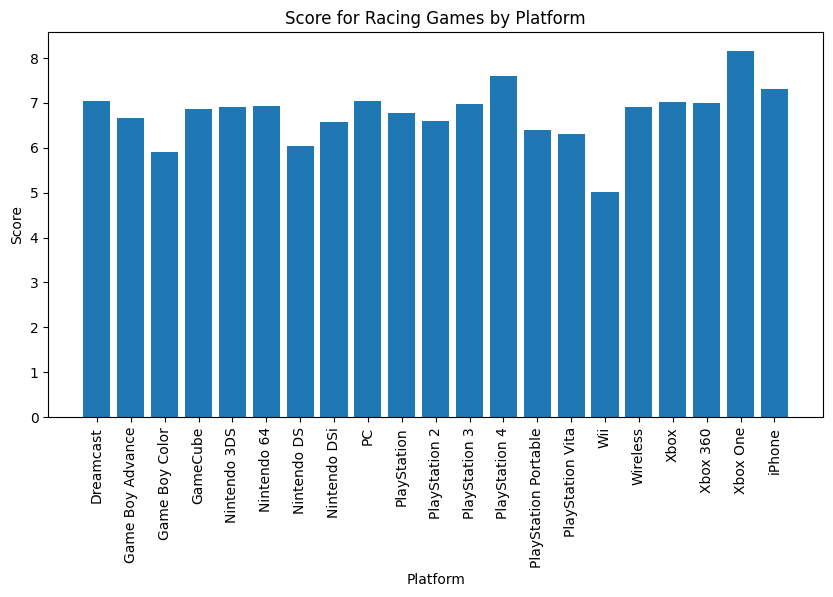

In [11]:
## (1 point)
## Use ign_scores to determine which gaming platform is the best for racing game.

# platform v racing
plt.figure(figsize=(10,5))
plt.bar(ign_scores.index,
        ign_scores["Racing"]

        )


#labels
plt.title("Racing Game Scores by Platform")
plt.xlabel("Platform")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()

###QUESTION 3 ANSWER:
Based on the bar chart, I do NOT expect a racing game for the Wii platform to recieve a high rating, as it seems to score the lowest at a little over 5 points. The best gaming platform appears to be the Xbox One, as it has the highest score of a little over 8 points.

#### Problem 4 - (2 points)
Since your instructor's gaming interests are pretty broad, you can help her decide to use the IGN scores to determine the choice of genre and platform.

1. Create a heatmap using the IGN scores by genre and platform and include the scores in the cells of the heatmap.
2. Base on the heatmap, which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings? Write the answers in a markdown cell.

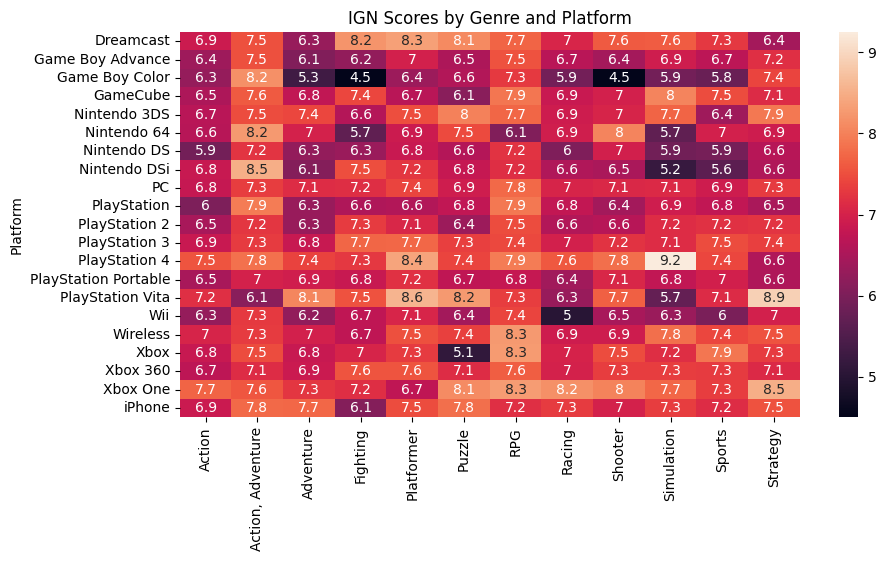

In [12]:
## Create a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(ign_scores, annot=True)
plt.title("IGN Scores by Genre and Platform")
plt.show()

### QUESTION 4 ANSWER
Based on the heatmap, the highest average ratings are Simulation games on the playstation four with a rating of 9.2

The lowest average ratings are fighting and shooter games on the Game Boy Color with an average score of 4.5

## Problem 5 - (4 points)
Use the Pokemon dataset to create a clustermap with color. First, filter the dataframe to only keep data with `Type 1` equals to following values: `Water`, `Normal`, `Grass`, `Bug` and `Psychic`. Annotate the dendrogram using different colors for these five different `Type 1` values. Use `Name` as the index.

pokemon_data is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

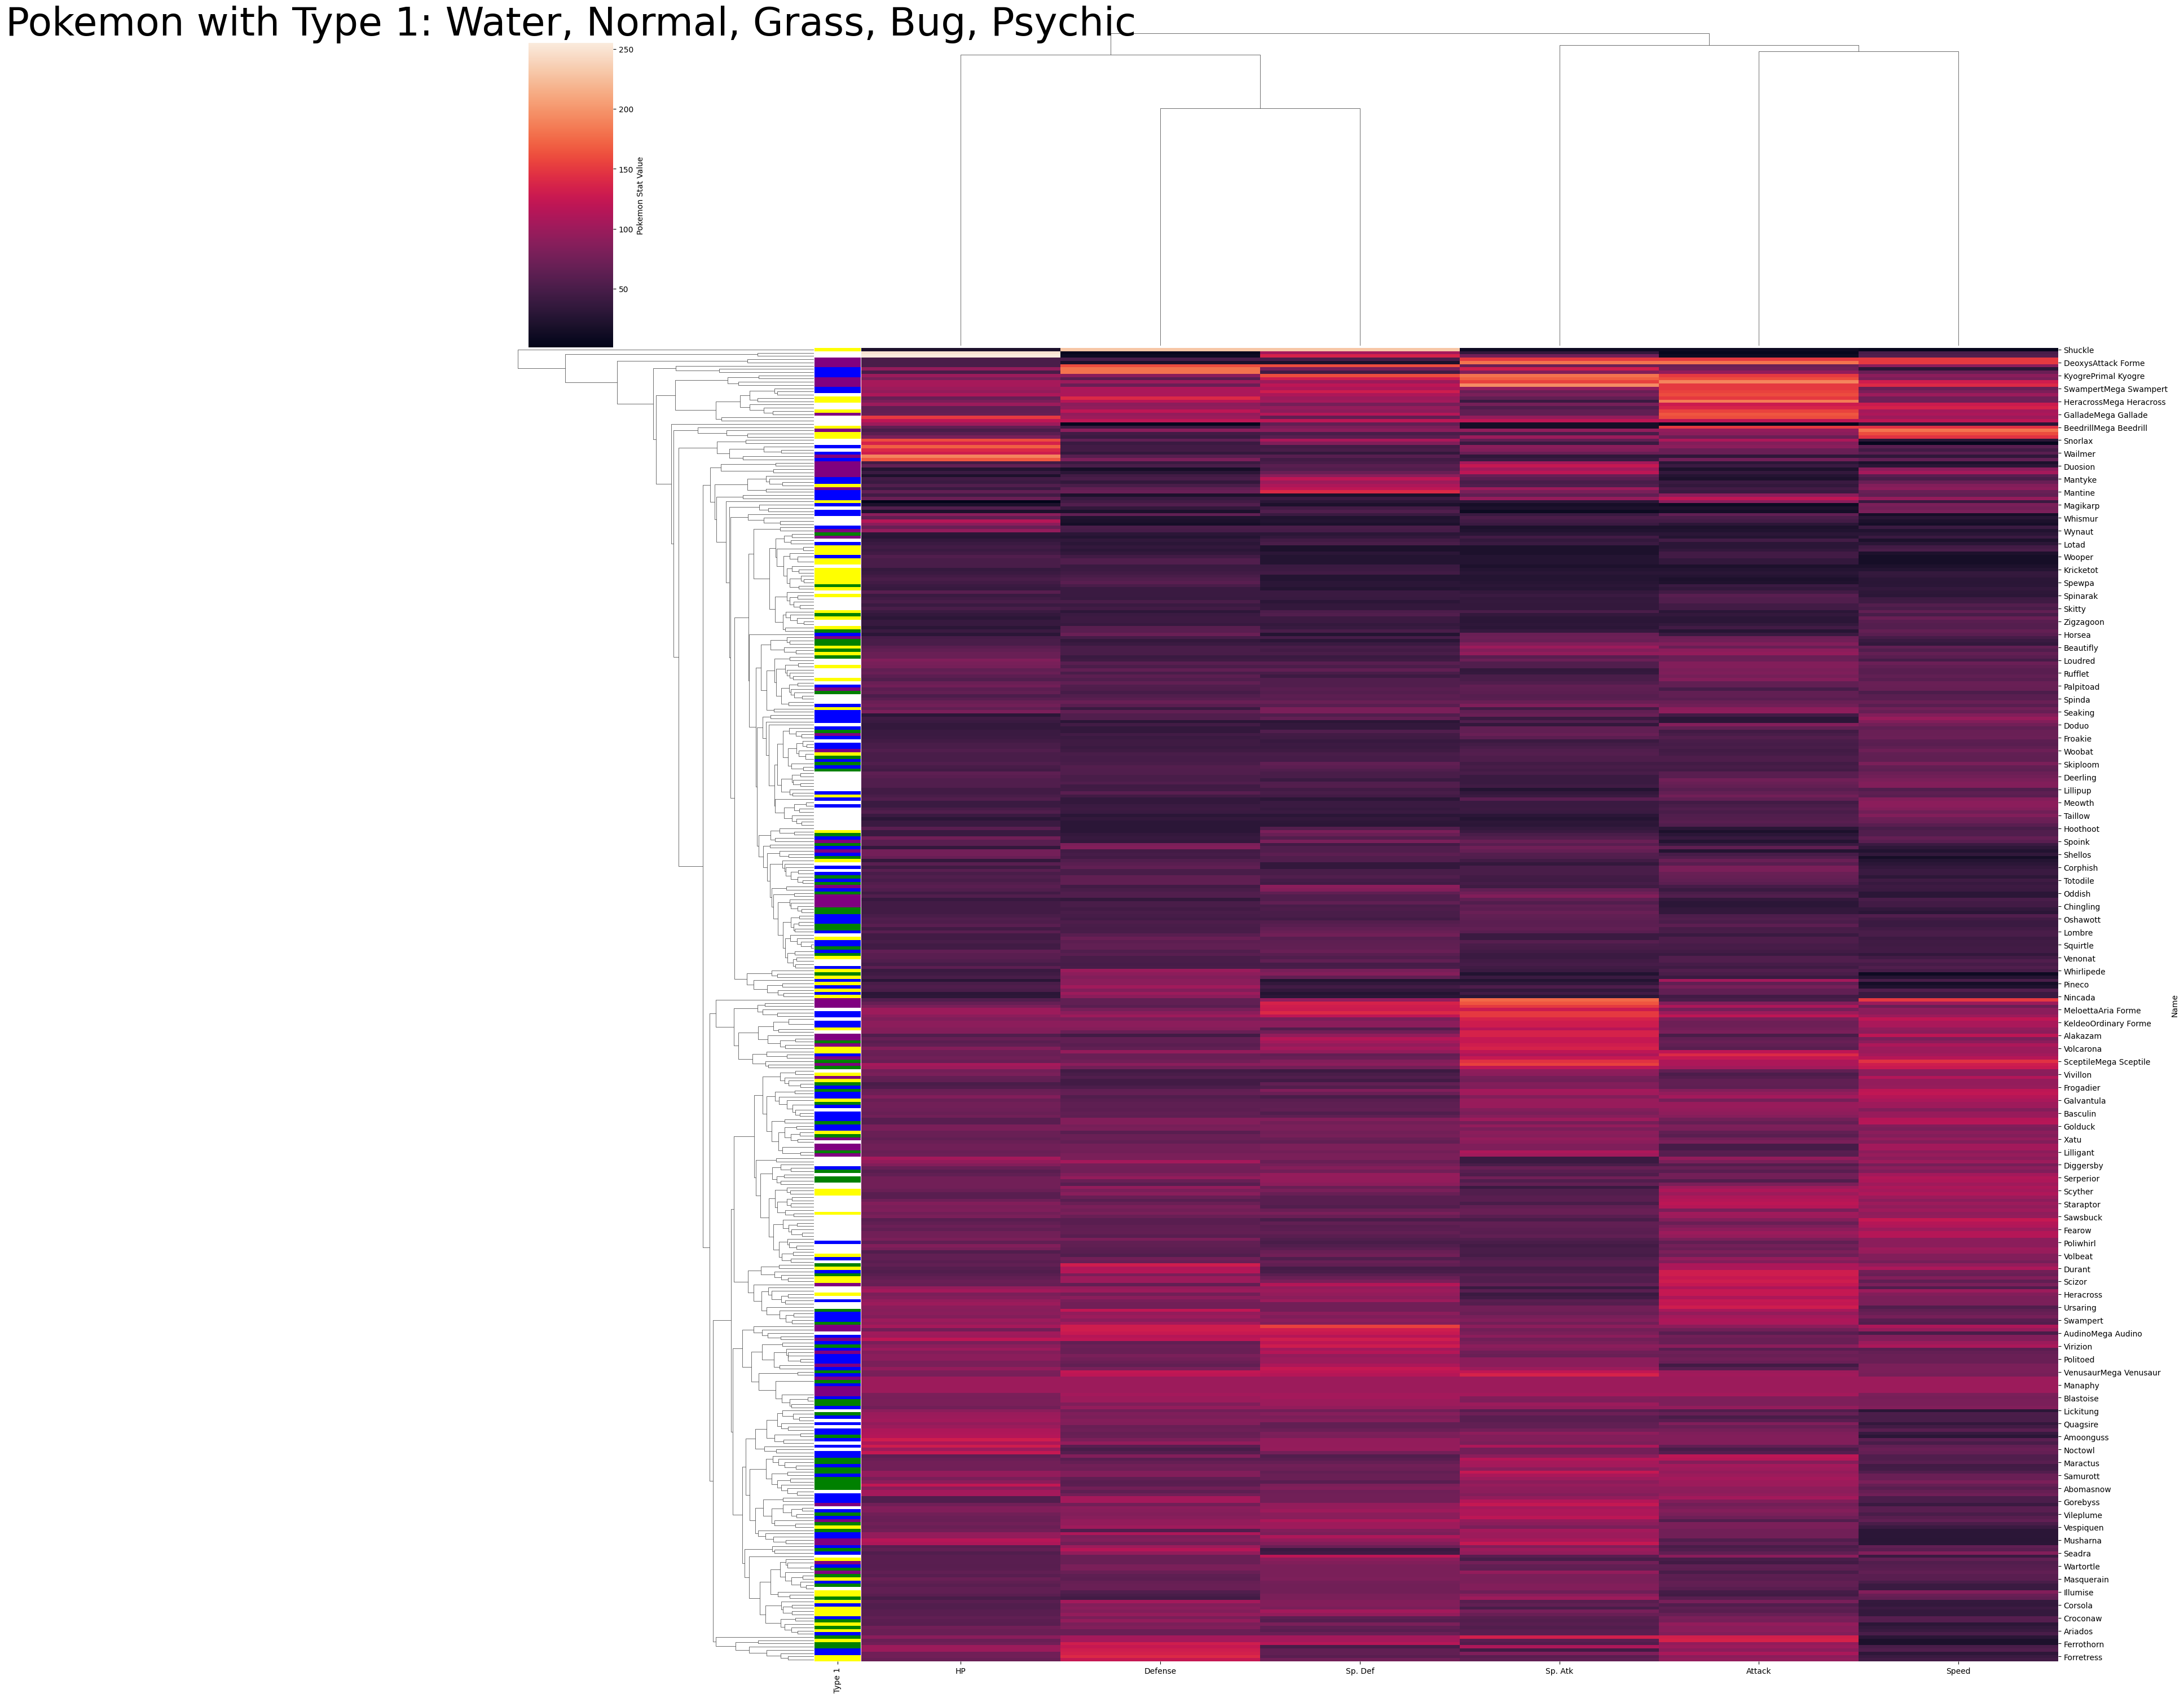

In [27]:
# Problem 5

pokemon = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv")

#filter the dataframe to pokemon belonging to type1
type1 = ["Water", "Normal", "Grass", "Bug", "Psychic"]
pokemon = pokemon[pokemon["Type 1"].isin(type1)]
pokemon.set_index("Name", inplace=True)
pokemon.head()

color = pokemon["Type 1"].map({'Water': 'blue', 'Normal': 'white', 'Grass' : 'green', 'Bug' : 'yellow', 'Psychic' : 'purple'})

sns.clustermap(
    pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], # 'Total' and 'Generation' are excluded for better visibility.
    row_colors=color,
    figsize=(30,30)
    )
#labels

plt.title("Pokemon with Type 1: Water, Normal, Grass, Bug, Psychic", fontsize = 25)
plt.ylabel("Pokemon Stat Value")
plt.show()